[View in Colaboratory](https://colab.research.google.com/github/snehi04/Machine-Learning-Using-Python/blob/master/Linear_Regression_Implementation.ipynb)

In [0]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
from matplotlib import pyplot
from matplotlib import pylab
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.utils import shuffle


In [0]:
#Loading Boston Data
data = datasets.load_boston()

In [12]:
#Description of the Boston Data
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [0]:
#Creating Dataframes 
housing_data = shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']),random_state = 1)


In [14]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,28.2
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,23.9
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10,22.0
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19,20.8


In [15]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


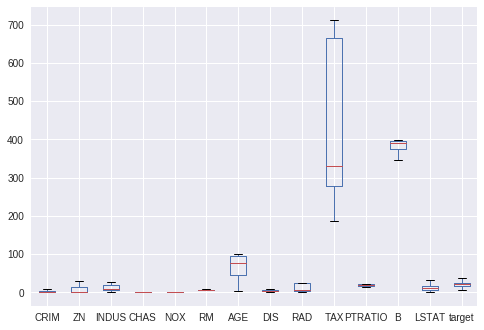

In [16]:
#Creating box plots
housing_data.plot.box()

In [0]:
#Splitting data into test,train and validation dataset
train_data = housing_data.iloc[0:304]
test_data = housing_data.iloc[304:406]
validation_data = housing_data.iloc[406:506]

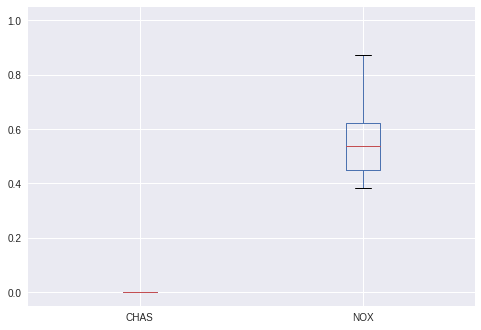

In [18]:
housing_data[['CHAS','NOX']].plot.box()

In [0]:
#Defining Linear Regression and Variable used in Train and Test Dataset 
lr = LinearRegression()
X=housing_data[['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
Y=housing_data['target']

In [20]:
#Normalizing the Data before fit and implementing linear regression fit
lr.normalize=True
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [22]:
#Prediction
print(lr.predict([X.iloc[505]]))
print(np.dot(lr.coef_,X.iloc[505])+lr.intercept_)
print(Y.iloc[505])

[23.11123204]
23.11123203536838
21.0


In [24]:
#Score Check
lr.score(X,Y)


0.7406077428649427

In [29]:
#Accuracy Check
from sklearn.metrics import mean_squared_error
mean_squared_error(y,lr.predict(X))

21.897779217687496

In [30]:
lr.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [32]:
#Checking Feature Importance
print(housing_data.columns[lr.coef_.argmin()])
print(housing_data.columns[lr.coef_.argmax()])

NOX
RM


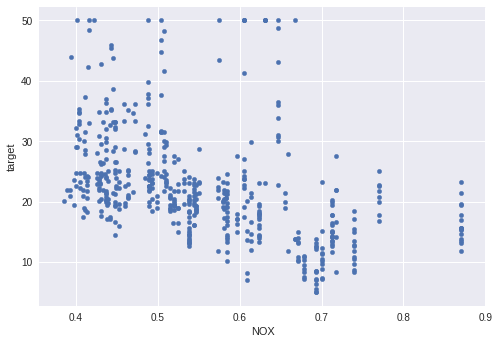

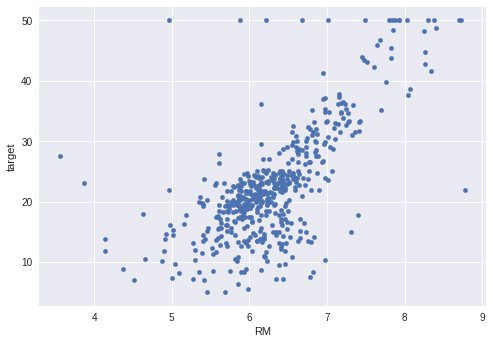

In [34]:
housing_data.plot.scatter(x='NOX',y='target')
housing_data.plot.scatter(x='RM',y='target')

In [0]:
#Implementing Ridge
lrr = Ridge()
X=housing_data[['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=housing_data['target']

In [41]:
lrr.normalize=True
lrr.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [43]:
#Prediction and Coeff and Intercept calculation
y1=lrr.predict([X.iloc[505]])
print(lrr.predict([X.iloc[505]]))
print(np.dot(lrr.coef_,X.iloc[505])+lrr.intercept_)
print(y.iloc[505])

[23.18239214]
23.182392141653352
21.0


In [44]:
#Error Rate
from sklearn.metrics import mean_squared_error
mean_squared_error(y,lrr.predict(X))

30.811950034724454